In [3]:
import pandas as pd
from marked_words import marked_words


# Figure A1

In [46]:
import matplotlib.pyplot as plt
import pickle
from matplotlib.patches import Patch
import matplotlib.ticker as mtick

CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.rcParams["figure.figsize"] = (14,6)
fontsizeval=35

In [47]:
# import stereotype lexicon
file = open("data/stereo_dict.pkl",'rb')
e_s_d = pickle.load(file)

In [48]:
df = pd.read_csv('data/dv3_main_generations.csv')
df_2 = pd.read_csv('data/dv2_main_generations.csv')

In [ ]:
# Compute counts of words in Black stereotype lexicon in generated personas

temp = dict()
for r in df['race'].unique():
    temp[r] = df.loc[df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()
for race,fullstring in fst_m.items():
#     print(race)
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    

In [59]:
df['text_clean'] = df['text'].str.lower().str.replace('[^\w\s]','',regex=True)
df_2['text_clean'] = df_2['text'].str.lower().str.replace('[^\w\s]','',regex=True)


In [65]:
# count number of stereotype words in each data point based on lexicon and add to respective dataframes
eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    eth_counts[ethnic] = []
    for i,ro in df.iterrows():
        count = 0
        for word in stereolist:
            count += ro['text_clean'].count(word)
        count /= len(ro['text_clean'].split(' '))
        eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    df[k] = v

eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    eth_counts[ethnic] = []
    for i,ro in df_2.iterrows():
        count = 0
        for word in stereolist:
            count += ro['text_clean'].count(word)
        count /= len(ro['text_clean'].split(' '))
        eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    df_2[k] = v

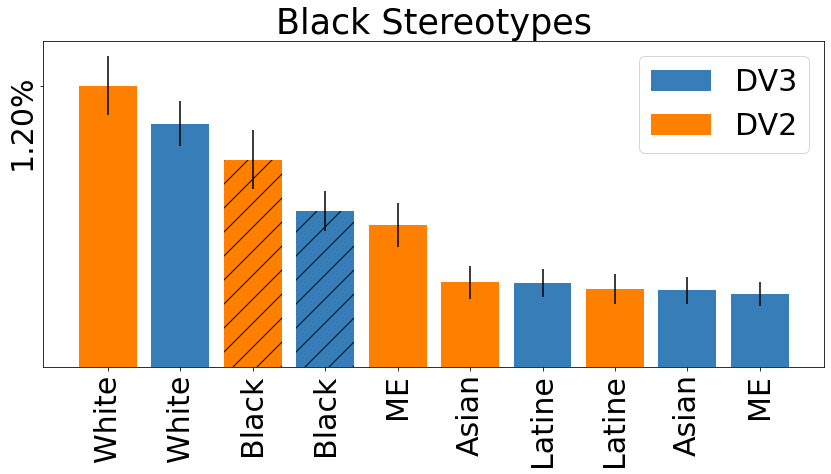

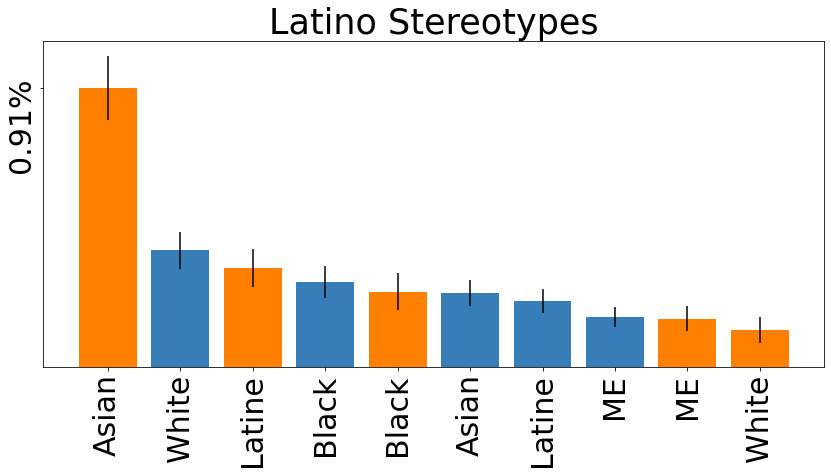

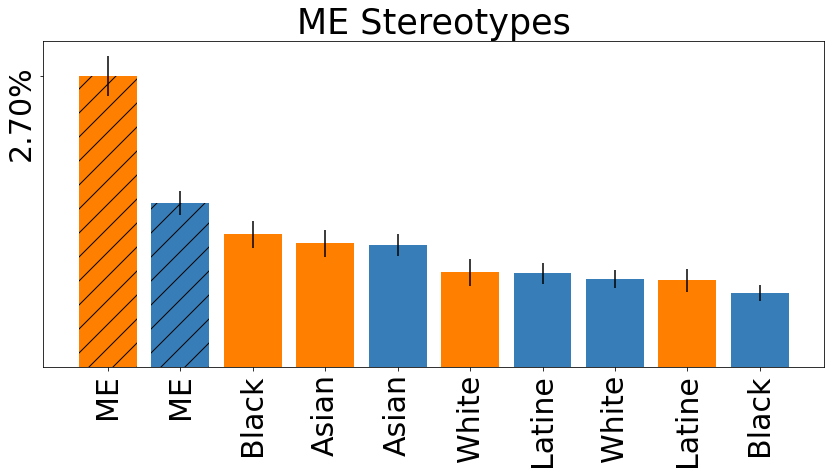

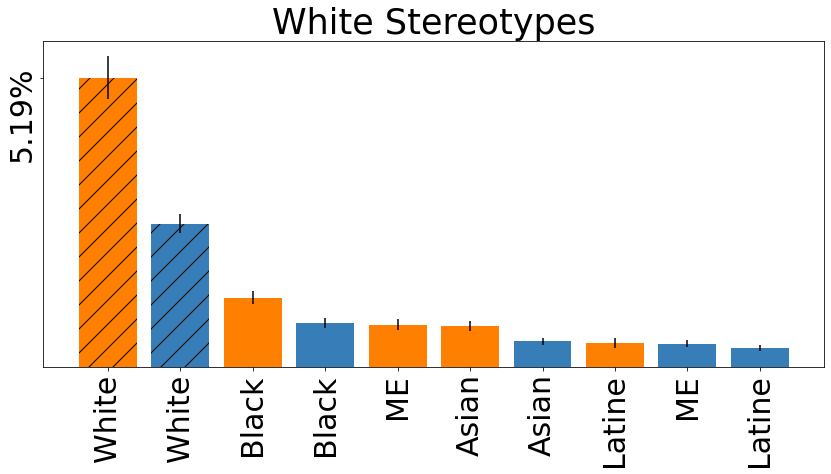

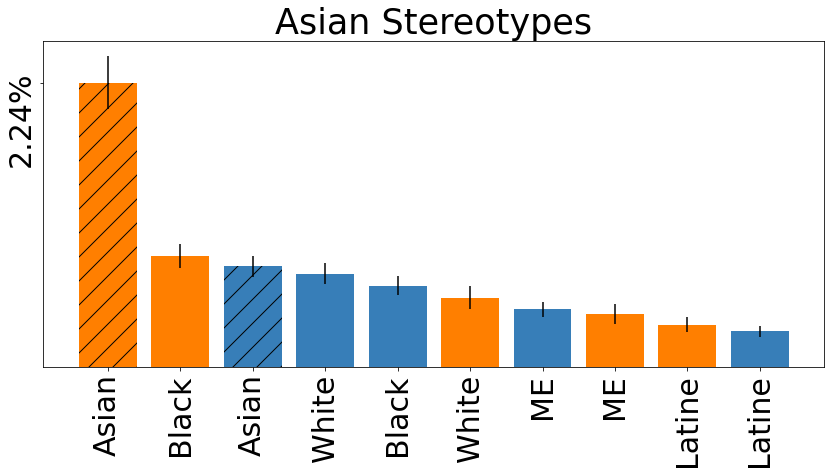

In [66]:

        
import matplotlib.ticker as mtick

for ethnic, stereolist in e_s_d['person'].items():
    reverse_count = dict()
    st='race'
    ra = alldata[st].unique()

    for i,r in enumerate(ra):
        b=np.mean(df.loc[df[st]==r][ethnic])
        c = np.std(df.loc[df[st]==r][ethnic])/ np.sqrt(np.size(df.loc[df[st]==r][ethnic]))
        if ethnic in reverse_count:
            reverse_count[ethnic][r.split(' ')[1]] = [b,c]
        else:
            reverse_count[ethnic] = {r.split(' ')[1]:[b,c]}
    temp=reverse_count[ethnic]
    names = list(temp.keys())
    values = list(temp.values())
#     print(len(values))
    c = [CB[0] for i in range(len(values))]

    reverse_count_2 = dict()
    
    fig, ax = plt.subplots()
    for i,r in enumerate(ra):
        b=np.mean(df_2.loc[df_2[st]==r][ethnic])
        std = np.std(df_2.loc[df_2[st]==r][ethnic])/ np.sqrt(np.size(df_2.loc[df_2[st]==r][ethnic]))

        if ethnic in reverse_count_2:
            reverse_count_2[ethnic][r.split(' ')[1]] = [b,std]
        else:
            reverse_count_2[ethnic] = {r.split(' ')[1]:[b,std]}
    temp=reverse_count_2[ethnic]
    names.extend(list(temp.keys()))
    values.extend(list(temp.values()))

    models = (['DV3']*5)
    models.extend(['DV2']*5)
    c.extend([CB[1] for i in range(len(values))])

    sor = sorted(zip(names,values,models,c),key=lambda p:p[1][0],reverse=True)
    
    names,values,models,c=zip(*sor)
    patt = []
    for n in names:
        if n[-1] in ['W','F']:
            patt.append('/')
        elif ethnic == n[-len(ethnic):]:
            patt.append('/')
        else:
            patt.append('')
    names=list(names)
    for i, n in enumerate(names):
        if n=='Middle-Eastern':
            names[i]='ME'
    if ethnic=='Middle-Eastern':
        ethnic='ME'
    plt.bar(range(len(values)), [v[0] for v in values], yerr=list([v[1] for v in values]),tick_label=names,color=c,hatch=patt,alpha=1)

    plt.title('%s Stereotypes' % ethnic,fontsize=fontsizeval)
    
    legend_elements = [Patch(facecolor=CB[0],
                             label='DV3'),
                       Patch(facecolor=CB[1],
                             label='DV2')]
    plt.yticks([values[0][0]])
    if ethnic=='Black':
        plt.legend(handles=legend_elements,fontsize=fontsizeval-5)
    plt.xticks(rotation = 90,fontsize=fontsizeval-5) # Rotates X-Axis Ticks by 45-degrees
    plt.yticks(fontsize=fontsizeval-5,rotation=90) # Rotates X-Axis Ticks by 45-degrees
    plt.gca().set_yticklabels([f'{x:.2%}' for x in plt.gca().get_yticks()]) 
    plt.savefig("figures/%s_st.pdf"%ethnic, format="pdf", bbox_inches="tight")
    plt.show()

#  Table A6

In [9]:
df = pd.read_csv('data/dv3_story_generations.csv')



In [11]:
for race in df['race'].unique():
    print(race)
    print(marked_words(df, [race], ['race'],['a White']))

a White
[]
a Black
['black']
an Asian
['asian', 'mei', 'ling', 'china', 'li', 'takashi', 'beijing', 'arts', 'martial', 'hua']
a Middle-Eastern
['her', 'village', 'middle', 'ali', 'east', 'middleeastern', 'ahmed', 'eastern', 'farid', 'hassan', 'fatima']
a Latine
['hard', 'determined', 'worked', 'business', 'proud', 'states', 'maria', 'latino', 'latina', 'juan', 'mexico', 'marisol', 'carlos', 'rafael', 'latin', 'jose']


In [12]:
print('W')
print(marked_words(df, ['W'], ['gender'],['M']))
print('M')
print(marked_words(df, ['M'], ['gender'],['W']))

W
['she', 'her', 'woman', 'determined', 'herself', 'dreams', 'maria', 'career', 'women', 'mei', 'latina', 'i', 'ling', 'li', 'my', 'nina', 'marisol', 'shed', 'independent', 'fatima']
M
['he', 'his', 'him', 'man', 'himself', 'john', 'ali', 'latino', 'juan', 'ahmed', 'takashi', 'hed', 'james', 'jack', 'shop', 'farid', 'carlos', 'rafael', 'martial', 'hassan', 'jose', 'marco']


In [13]:
# Top words for intersectional groups
for race in df['race'].unique():
    print("Top words for " + race + " W")
    print(marked_words(df, [race, 'W'], ['race', 'gender'],['a White','M']))

Top words for a White W
['she', 'her']
Top words for a Black W
['she', 'her', 'black', 'sheila']
Top words for an Asian W
['she', 'her', 'asian', 'mei', 'ling', 'li']
Top words for a Middle-Eastern W
['her', 'middleeastern', 'fatima']
Top words for a Latine W
['she', 'her', 'maria', 'latina', 'marisol']


## Top words using one-vs-all classifiers

In [14]:
import numpy as np
import re
import sklearn.feature_selection 
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


vectorizer = CountVectorizer(binary = True, decode_error = u'ignore')
tokenizer = vectorizer.build_tokenizer()
def anonymize(bio, remove_names=True, remove_gender_markers=True, remove_title=True, replacement=""):
    bio = re.sub(r"\b(?:[Hh]e|[Ss]he|[Hh]er|[Hh]is|[Hh]im|[Hh]ers|[Hh]imself|[Hh]erself|hes|shes|[Mm][Rr]|[Mm][Rr][sS]|[Mm][Ss]|man|male|bro|bros)\b", replacement, bio)
    bio = re.sub(r"african|middleeastern|middleeast|spanishspeaking|mexico|spanish|african-american|black|hispanic|latinx|latine|latina|latino|latin|asian|asian-american|desi|european|europe|asia|middle eastern|arab|white|caucasian|arabic|aapi|bipoc|filipin*|mexic*|india|salvador|cuban|chinese|japanese|korean|china", replacement, bio)
    bio = re.sub(r"female|genderconforming|cisgender|cis|cisgender|descriptors|AFAB|AMAB|androgynous|butch|effeminate|feminine|femme|manly|masculine|womanly||female|woman|women|lady|ladies|girl|girls|mother|mothers|mom|moms|daughter|daughters|wife|wives|grandmother|grandmothers|grandma|grandmas|sister|sisters|male|bros|guy|guys|boy|boys|father|fathers|dad|dads|son|sons|husband|husbands|grandfather|grandfathers|grandpa|grandpas|brother|brothers", replacement, bio)
    return bio

In [15]:
alldata = df.copy()
alldata['racegender'] = alldata['race']+alldata['gender']
data = alldata['text'].str.lower().replace('[^\w\s]','',regex=True)
top_words = dict()

In [16]:
for st in ['race','gender','racegender']:
    print(st.upper())
    concept_data = [anonymize(d) for d in data]

    labels = alldata[st]

    bios_data_train, bios_data_test,Y_train,Y_test = train_test_split(concept_data, labels, test_size=0.2, random_state=42, stratify=labels)

    vectorizer = CountVectorizer(analyzer='word',min_df=0.001,binary=False)
    X_train = vectorizer.fit_transform(bios_data_train)
    X_test = vectorizer.transform(bios_data_test)
    accs = []
    feature_names = vectorizer.get_feature_names_out()
    for r in alldata[st].unique():
        svm = SVC(kernel='linear')
        Y_train_bin = Y_train==r
        svm.fit(X_train, Y_train_bin)
        acc=sklearn.metrics.accuracy_score(Y_test==r,svm.predict(X_test))
        print("%s Accuracy: %.2f"%(r,acc))
        accs.append(acc)
        coef = svm.coef_.toarray()[0]
        _, names = zip(*sorted(zip(coef,feature_names)))
        print("Top 10 words: %s" % str(names[-10:][::-1]))
    print("Mean accuracy across %s groups: %.2f ± %.2f"%(st,np.mean(accs),np.std(accs)))

RACE
a White Accuracy: 0.80
Top 10 words: ('out', 'john', 'elizabeth', 'own', 'louise', 'helen', 'mary', 'find', 'life', 'on')
a Black Accuracy: 0.77
Top 10 words: ('only', 'willis', 'into', 'martin', 'role', 'company', 'how', 'even', 'lydia', 'than')
an Asian Accuracy: 0.82
Top 10 words: ('mei', 'ling', 'li', 'city', 'takashi', 'martial', 'arts', 'jinyan', 'shanghai', 'fei')
a Middle-Eastern Accuracy: 0.82
Top 10 words: ('middle', 'east', 'ali', 'village', 'farid', 'country', 'ahmed', 'decided', 'society', 'but')
a Latine Accuracy: 0.88
Top 10 words: ('maria', 'marisol', 'rafael', 'juan', 'determined', 'proud', 'up', 'states', 'hard', 'lupita')
Mean accuracy across race groups: 0.82 ± 0.04
GENDER
M Accuracy: 0.77
Top 10 words: ('john', 'ricardo', 'american', 'which', 'martin', 'juan', 'before', 'began', 'jerry', 'takashi')
W Accuracy: 0.77
Top 10 words: ('shed', 'maria', 'dreams', 'after', 'help', 'mei', 'school', 'worked', 'career', 'determined')
Mean accuracy across gender groups: 0

## Top words using JSD

In [17]:
import shifterator as sh
from collections import defaultdict

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


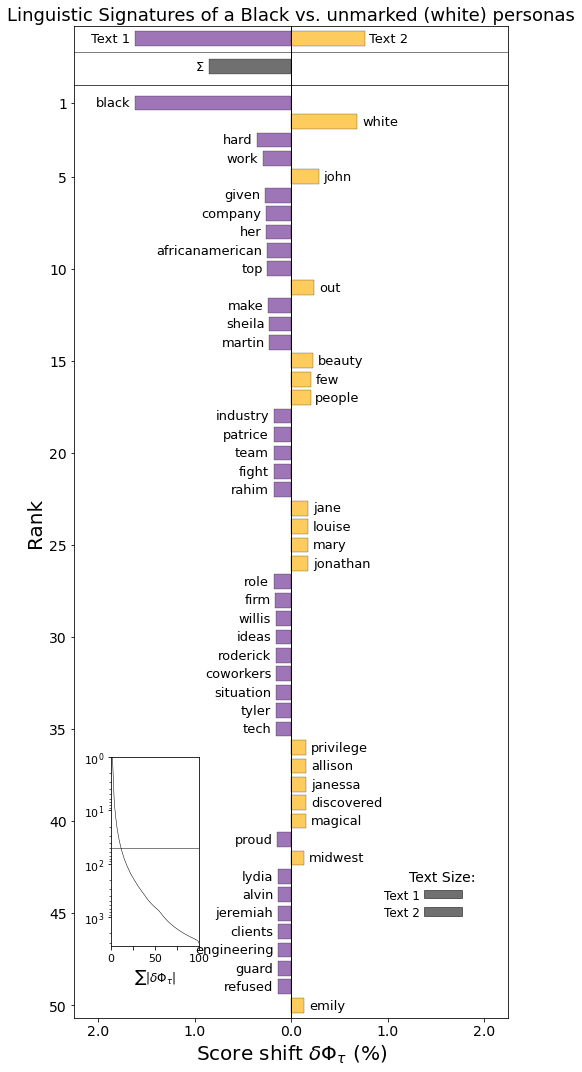

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


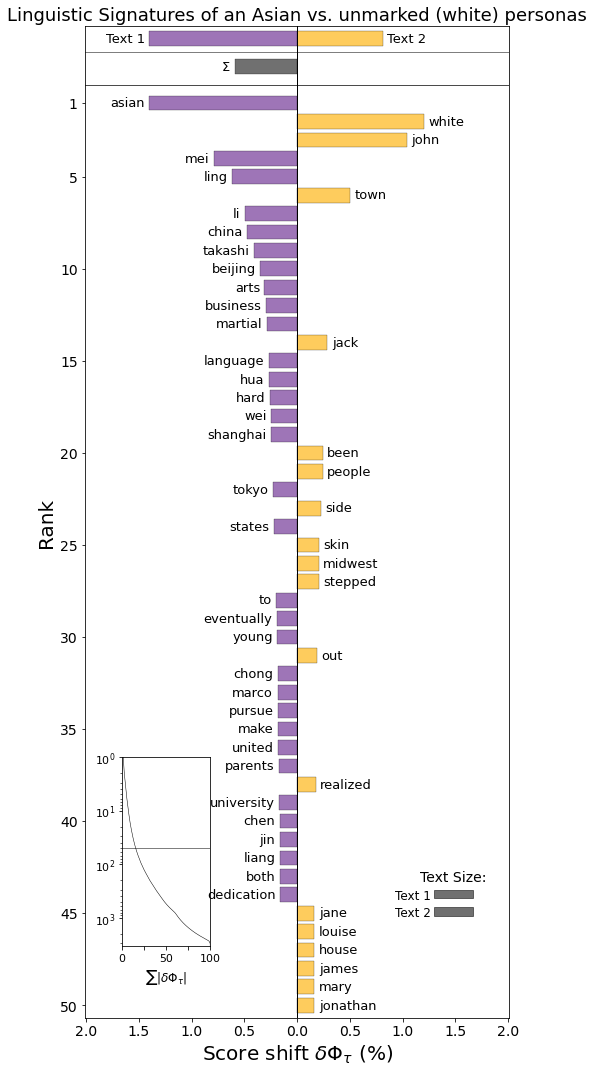

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


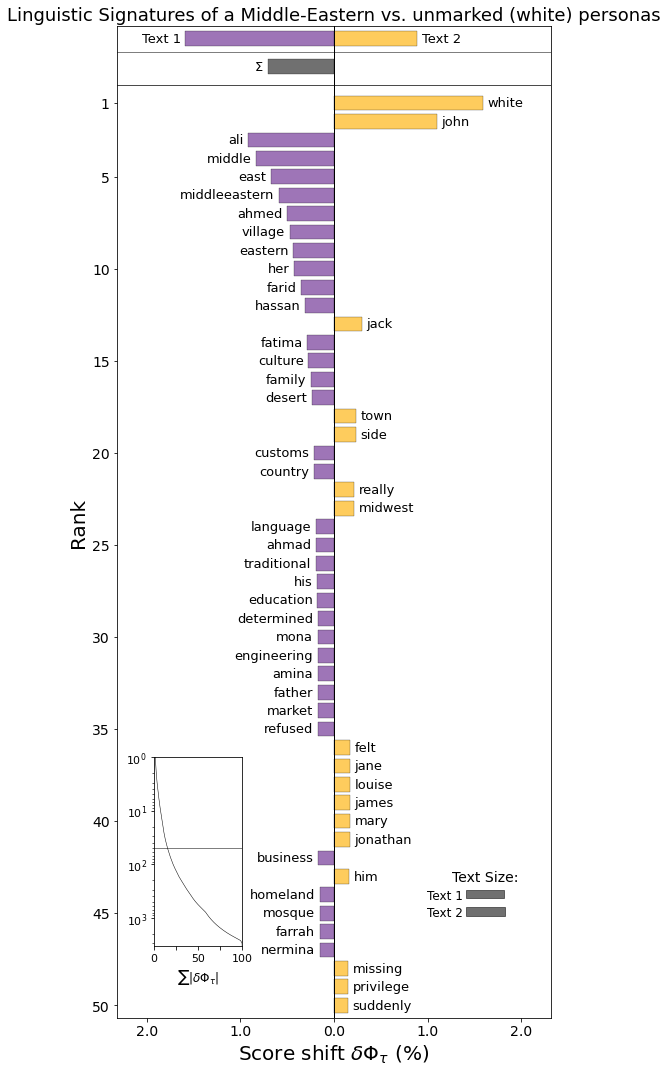

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


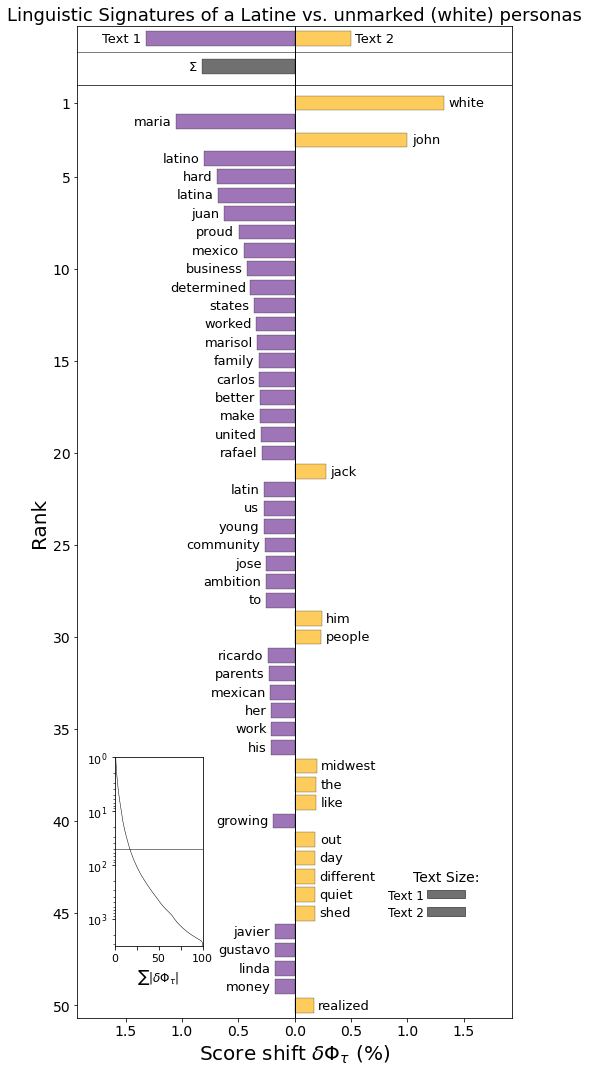

In [18]:
# Race groups

for r in df['race'].unique():
#     print(r)
    if 'hite' not in r:
        df1=df.loc[df['race']==r]['text']
        df2= df.loc[df['race']=='a White']['text']

        counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
        counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

        jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                         type2freq_2=counts2,
                                         weight_1=0.5,
                                         weight_2=0.5,
                                         base=2,
                                         alpha=1)
        jsd_shift.get_shift_graph(title='Linguistic Signatures of %s vs. unmarked (white) personas'%r)

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


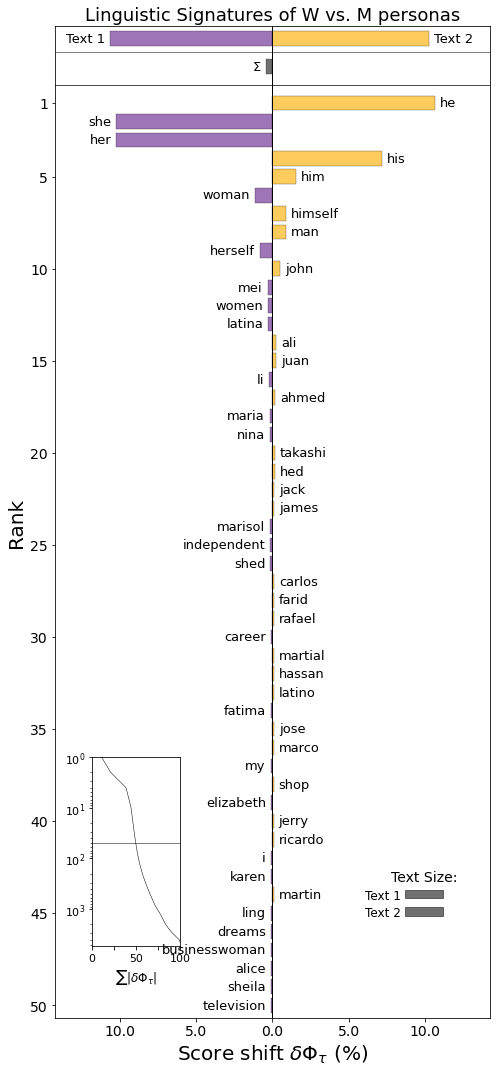

<AxesSubplot:title={'center':'Linguistic Signatures of W vs. M personas'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [19]:
# Gender groups


df1=alldata.loc[alldata['gender']=='W']['text']
df2= df.loc[df['gender']=='M']['text']

counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                 type2freq_2=counts2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(
                          title='Linguistic Signatures of W vs. M personas')

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


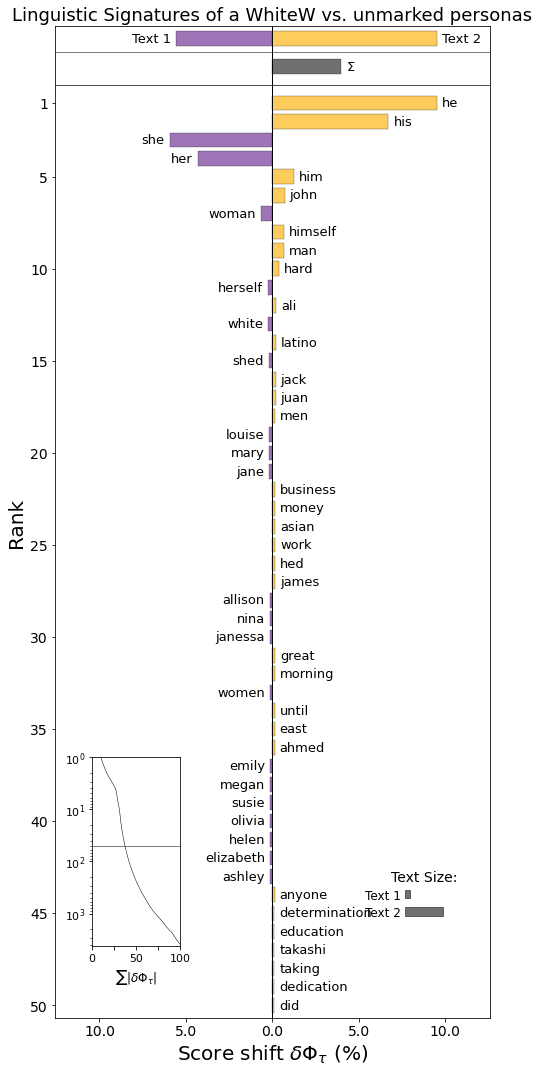

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


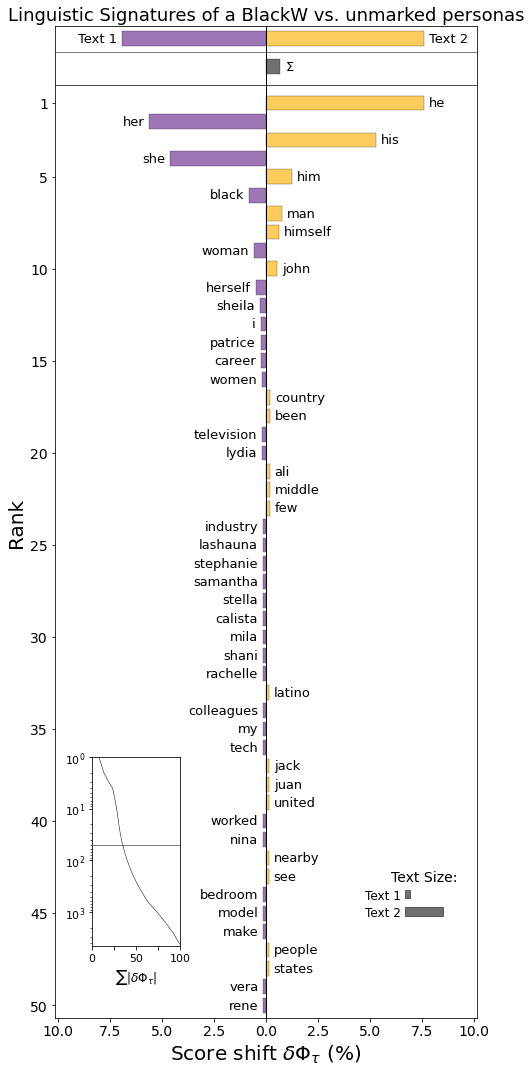

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


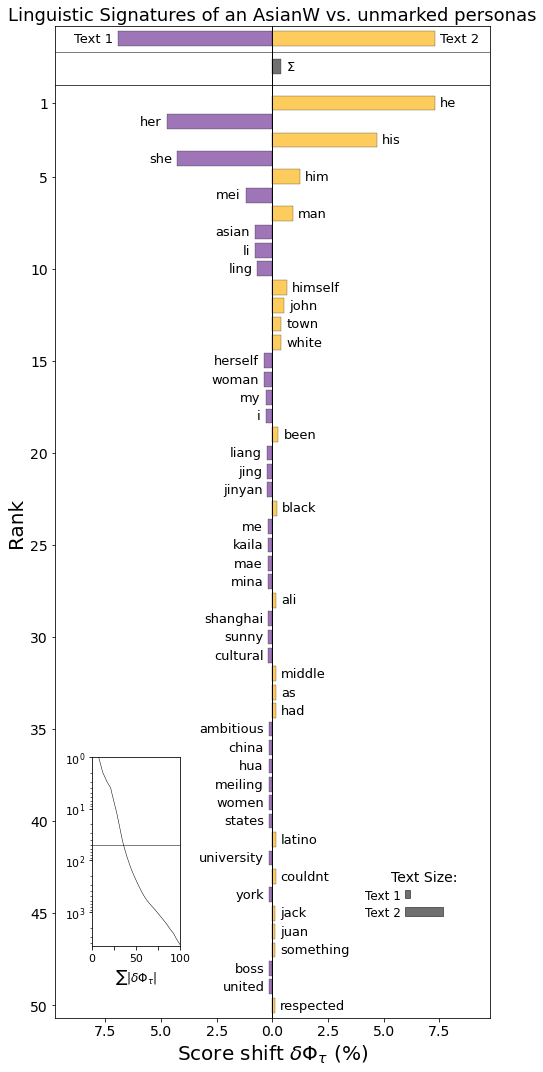

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


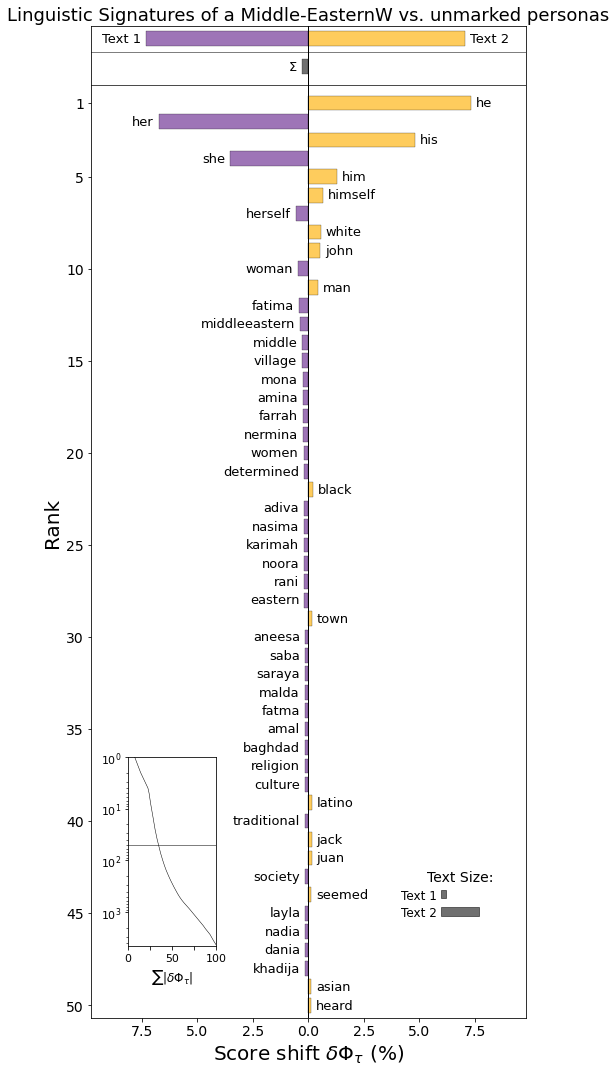

/opt/homebrew/lib/python3.9/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


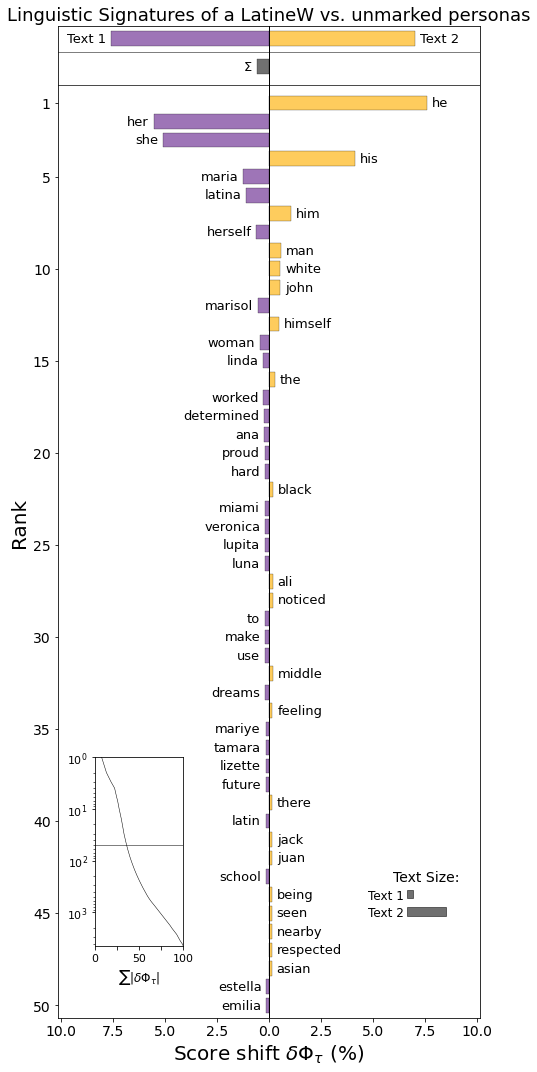

In [20]:
# Gender-by-race/ethnic groups

for r in alldata['racegender'].unique():
#     print(r)
    if r[-1] =='W':
        df1=alldata.loc[alldata['racegender']==r]['text']
        df2= pd.concat([df.loc[df['race']=='a White'],df.loc[df['gender']=='M']])['text']

        counts1 = defaultdict(int,[[i,j] for i,j in df1.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])
        counts2 = defaultdict(int,[[i,j] for i,j in df2.str.lower().str.split(expand=True).stack().replace('[^a-zA-Z\s]','',regex=True).value_counts().items()])

        jsd_shift = sh.JSDivergenceShift(type2freq_1=counts1,
                                         type2freq_2=counts2,
                                         weight_1=0.5,
                                         weight_2=0.5,
                                         base=2,
                                         alpha=1)
        jsd_shift.get_shift_graph(
                                  title='Linguistic Signatures of %s vs. unmarked personas'%r)